In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d rakeshrau/social-network-ads

  0% 0.00/3.27k [00:00<?, ?B/s]
100% 3.27k/3.27k [00:00<00:00, 12.0MB/s]


In [4]:
#unzipping
import zipfile
zip_ref = zipfile.ZipFile('/content/social-network-ads.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df = df[['Age','EstimatedSalary','Purchased']]

In [8]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled.shape

(400, 2)

In [13]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
#X_train.shape

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [21]:
#for stochastic GD

In [30]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=20,batch_size=1,validation_split=0.2) #batchsize we put 1 when have to update wt. for every datapoint
#print(time.time() - start)

Epoch 1/20
320/320 [==============================] - 1s 2ms/step - loss: 0.5137 - accuracy: 0.8125 - val_loss: 0.6350 - val_accuracy: 0.5625
Epoch 2/20
320/320 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8438 - val_loss: 0.5064 - val_accuracy: 0.7750
Epoch 3/20
320/320 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.8750 - val_loss: 0.4140 - val_accuracy: 0.8875
Epoch 4/20
320/320 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.8656 - val_loss: 0.3525 - val_accuracy: 0.9125
Epoch 5/20
320/320 [==============================] - 0s 1ms/step - loss: 0.2730 - accuracy: 0.8687 - val_loss: 0.3152 - val_accuracy: 0.9250
Epoch 6/20
320/320 [==============================] - 0s 1ms/step - loss: 0.2645 - accuracy: 0.8750 - val_loss: 0.2804 - val_accuracy: 0.9500
Epoch 7/20
320/320 [==============================] - 1s 2ms/step - loss: 0.2685 - accuracy: 0.8781 - val_loss: 0.2591 - val_accuracy: 0.9750
Epoch 

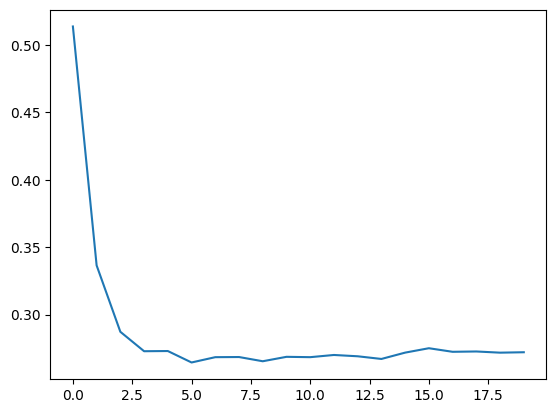

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [34]:
#for batch GD

In [35]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=400,batch_size=320,validation_split=0.2) #here we take batch size equal to number of datapoints
#print(time.time() - start)

Epoch 1/400
1/1 [==============================] - 1s 562ms/step - loss: 0.5222 - accuracy: 0.7437 - val_loss: 0.7285 - val_accuracy: 0.4750
Epoch 2/400
1/1 [==============================] - 0s 29ms/step - loss: 0.5164 - accuracy: 0.7531 - val_loss: 0.7248 - val_accuracy: 0.5000
Epoch 3/400
1/1 [==============================] - 0s 28ms/step - loss: 0.5123 - accuracy: 0.7594 - val_loss: 0.7217 - val_accuracy: 0.5000
Epoch 4/400
1/1 [==============================] - 0s 30ms/step - loss: 0.5089 - accuracy: 0.7625 - val_loss: 0.7188 - val_accuracy: 0.5125
Epoch 5/400
1/1 [==============================] - 0s 28ms/step - loss: 0.5060 - accuracy: 0.7625 - val_loss: 0.7162 - val_accuracy: 0.5125
Epoch 6/400
1/1 [==============================] - 0s 27ms/step - loss: 0.5033 - accuracy: 0.7625 - val_loss: 0.7138 - val_accuracy: 0.5125
Epoch 7/400
1/1 [==============================] - 0s 27ms/step - loss: 0.5008 - accuracy: 0.7656 - val_loss: 0.7115 - val_accuracy: 0.5125
Epoch 8/400
1/1 [==

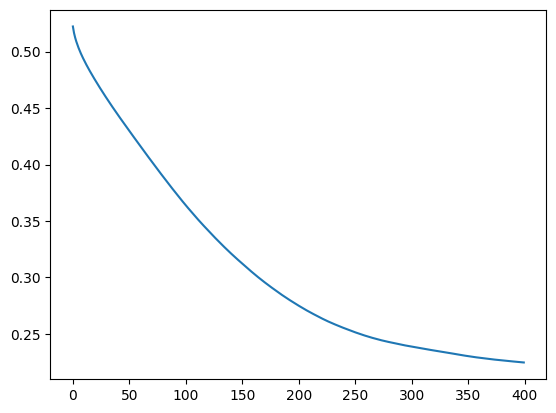

In [39]:
plt.plot(history.history['loss'])